<a href="https://colab.research.google.com/github/J-SriHarsha/harsha/blob/main/Simple%20linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install seaborn
import pandas as pd
#for reading for different data sources
import matplotlib.pyplot as plt
# for visualization
import numpy as np
%matplotlib inline
# to display all visualization graph within the notebook.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving height.csv to height.csv


In [4]:
df=pd.read_csv('height.csv')

In [6]:
df.head()

,Weight,Height,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,45,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

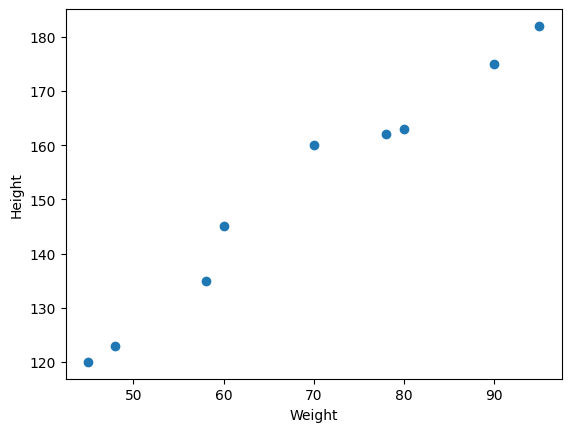

In [9]:
##scatter plot
plt.scatter(df['Weight'],df['Height '])
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
print(df.columns)

Index(['Weight', 'Height '], dtype='object')


In [11]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.986491
Height,0.986491,1.000000


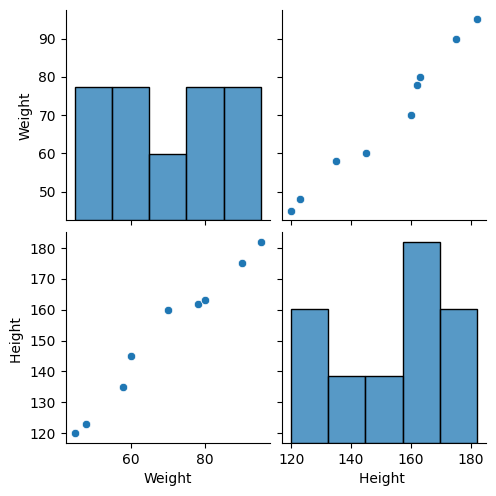

In [12]:
## Seaborn for visulization
import seaborn as sns
sns.pairplot(df)
#in a

In [13]:
## Independdent and dependent features
X=df[['Weight']]  ## independent should be df or 2 dimensional arr
Y=df['Height ']  ##variable can be in series or 1dimensional arr
np.array(X).shape

(9, 1)

In [14]:
X_series=df['Weight']
np.array(X_series).shape
# shouldnt keep in this format.. but we are just trying

(9,)

In [15]:
#independent can have series.. only 1 column values.we dont need to make it 2d..becuse we have only 1 deppendent feature
#this is regression as the output is continuous
Y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182


In [18]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42) # Assign the output to variables

In [19]:
X_train.shape

(6, 1)

In [20]:
## Standardization1
# here if unnits are like diff in X and Y then here we use zscore formula .. mean=0,sd=1
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[-1.21382919],
       [ 1.63108297],
       [-1.04313446],
       [ 0.20862689],
       [-0.36035554],
       [ 0.77760932]])

In [22]:
X_test = scaler.transform(X_test)

In [23]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [24]:
regression=LinearRegression()

In [25]:
regression.fit(X_train,Y_train)

LinearRegression()

In [28]:
regression.coef_
#slope is 1 as we have 1 independent feature
#1 unit moment in weight value that leads to the value of coeff in height value.

array([1.24010791])

In [29]:
regression.intercept_
#weigtht value is 0 at what point its meting in y axis is intercept value.

66.57284172661872

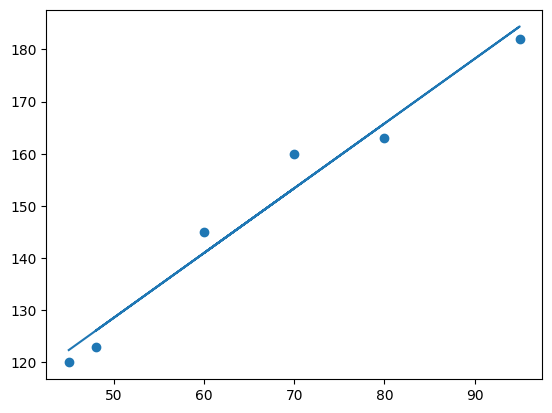

In [30]:
## Plot Training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [32]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
## Prediction for test data
Y_pred=regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
mse = mean_squared_error(Y_test,y_pred) # Changed Y_pred to Y_pred
mae = mean_absolute_error(Y_test,y_pred) # Changed Y_pred to Y_pred
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8370.03638365679
90.12545195243528
91.48790293616304


In [37]:
## rsquare
#R^2 =1-SSR/SST
#R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [38]:
from sklearn.metrics import r2_score

In [44]:
#score=r2_score(Y_test,Y_pred)
## Prediction for test data
Y_pred=regression.predict(X_test)

## rsquare
#R^2 =1-SSR/SST
#R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

score=r2_score(Y_test,Y_pred)
print(score)

8370.03638365679
90.12545195243528
91.48790293616304
-29.1562559859532


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
#Adjusted R2 = 1-[(1-R2)*(n-1)(n-k-1)]
#R2= of model, n= no of obs, k= number of pred var

In [49]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

-59.3125119719064

In [51]:
import statsmodels.api as sm # Import the statsmodels library and alias it as 'sm'

model=sm.OLS(Y_train,X_train).fit() # Now you can use 'sm' to access statsmodels functions

In [52]:
prediction = model.predict(X_test)
print(prediction)

[ 2.93272376 -1.03264921  1.44570889]


In [53]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Height    R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              365.6
Date:                Fri, 28 Feb 2025   Prob (F-statistic):                    7.21e-06
Time:                        05:20:12   Log-Likelihood:                         -25.679
No. Observations:                   6   AIC:                                      53.36
Df Residuals:                       5   BIC:                                      53.15
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [54]:
## Prediction for new data
regression.predict([[72]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([155.86061151])

In [57]:
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.97268151])